In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns


# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import costum_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
df = df_train_with_weather[["item_nbr", "units"]]

In [3]:
df = df.groupby("item_nbr").agg(["max", "mean"])

In [4]:
df.tail()

units          
           max      mean
item_nbr                
107          7  0.012837
108         21  0.049159
109         30  0.101154
110         94  0.033702
111         12  0.006106

In [5]:
item_1 = df_train_with_weather[df_train_with_weather["item_nbr"] == 1]

In [6]:
item_1_without_tmax_M =item_1[item_1["tmax"] != "M"]

In [7]:
item_1_without_tmax_M["tmax"] = item_1_without_tmax_M["tmax"].astype(int)

In [8]:
xx = np.linspace(-12, 115, 40596)

In [9]:
df_train_with_weather["date"] = df_train_with_weather["date"].apply(cf.dateToNumeric)

In [10]:
df_weather["station_nbr"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20,  5], dtype=int64)

In [11]:
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 3]

In [12]:
df.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617151,20141031,33,107,0,3,55,33,44,-12,32,...,0645,1729,,0.0,0.00,29.65,30.36,11.1,35,11.5
4617152,20141031,33,108,0,3,55,33,44,-12,32,...,0645,1729,,0.0,0.00,29.65,30.36,11.1,35,11.5
4617153,20141031,33,109,0,3,55,33,44,-12,32,...,0645,1729,,0.0,0.00,29.65,30.36,11.1,35,11.5
4617154,20141031,33,110,0,3,55,33,44,-12,32,...,0645,1729,,0.0,0.00,29.65,30.36,11.1,35,11.5
4617155,20141031,33,111,0,3,55,33,44,-12,32,...,0645,1729,,0.0,0.00,29.65,30.36,11.1,35,11.5


In [13]:
def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

In [14]:
def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

In [15]:
df["units"] = df["units"].apply(changeType)

In [16]:
df["tavg"] = df["tavg"].apply(changeType)

In [17]:
df["snowfall"] = df["snowfall"].apply(changeFloatType)

In [18]:
df["depart"] = df["depart"].apply(changeType)

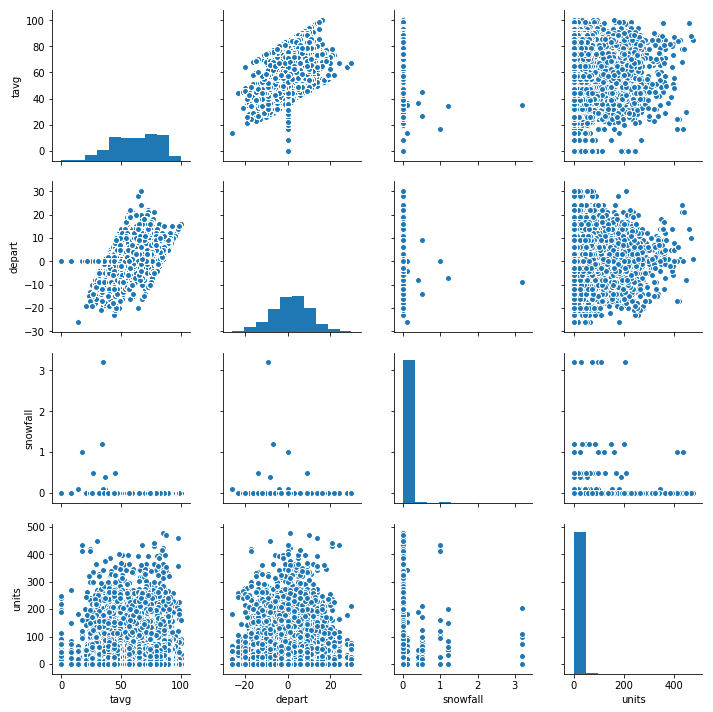

In [19]:
cols = ["tmax", "tavg", "depart", "snowfall", "units"]
sns.pairplot(df[cols])
plt.show()

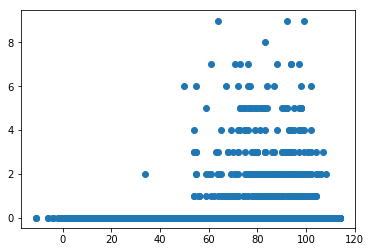

In [20]:
plt.scatter(item_1_without_tmax_M["tmax"], item_1_without_tmax_M["units"])
plt.show()

In [21]:
result_li = [cf.isThereNoneData(df_weather[df_weather["station_nbr"] == i]) for i in range(1, 21)]

In [22]:
for result in result_li:
    result.drop("Column", axis = 1, inplace = True)

In [23]:
df = pd.concat([result for result in result_li], axis = 1)

In [24]:
cf.saveDataFrameToCsv(df, "station")

In [25]:
result_li[]

SyntaxError: invalid syntax (<ipython-input-25-c6b398826dc2>, line 1)

In [ ]:
df_station_m_t_data = df_station_m_t_data.drop(["Column"], axis=1)